In [1]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact

from matplotlib import pyplot as plt

In [15]:
plt.rcParams['font.size'] = 16

## Indlæs data samt let del data i to kategorier

In [3]:
data = pd.read_csv('DataScientist-Case-Dataset.csv')
data

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


In [4]:
# check if some are without customer_id, or if some are register twice
#checks for na
data_na_id = data[data['customer_id'].isnull()]
print(f'Der er {len(data_na_id)} som ikke har et id')

count_id = np.unique(data['customer_id'])
print(f'Der er {len(count_id)} unikke id, og der er {len(data)} med i dataet')

Der er 0 som ikke har et id
Der er 891 unikke id, og der er 891 med i dataet


In [5]:
data_con = data[data['converted'] == 1]
data_not = data[data['converted'] == 0]

#quick check to make use all data is used 
if (len(data_con) + len(data_not) != len(data)):
    print('STOP!!!! %1.0f rows are missing' %(len(data) - (len(data_con) + len(data_not))))

    
#branch data cleaning
data_con_bra = data_con[data_con['branch'].notnull()]
data_not_bra = data_not[data_not['branch'].notnull()]

#credit account data cleaning
data_con_cre = (data_con[data_con['credit_account_id'] != '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']
                .sort_values('credit_account_id')
               )
data_not_cre = (data_not[data_not['credit_account_id'] != '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']
                .sort_values('credit_account_id')
               )

## Creating a lot of plots to try to  visualize parameters

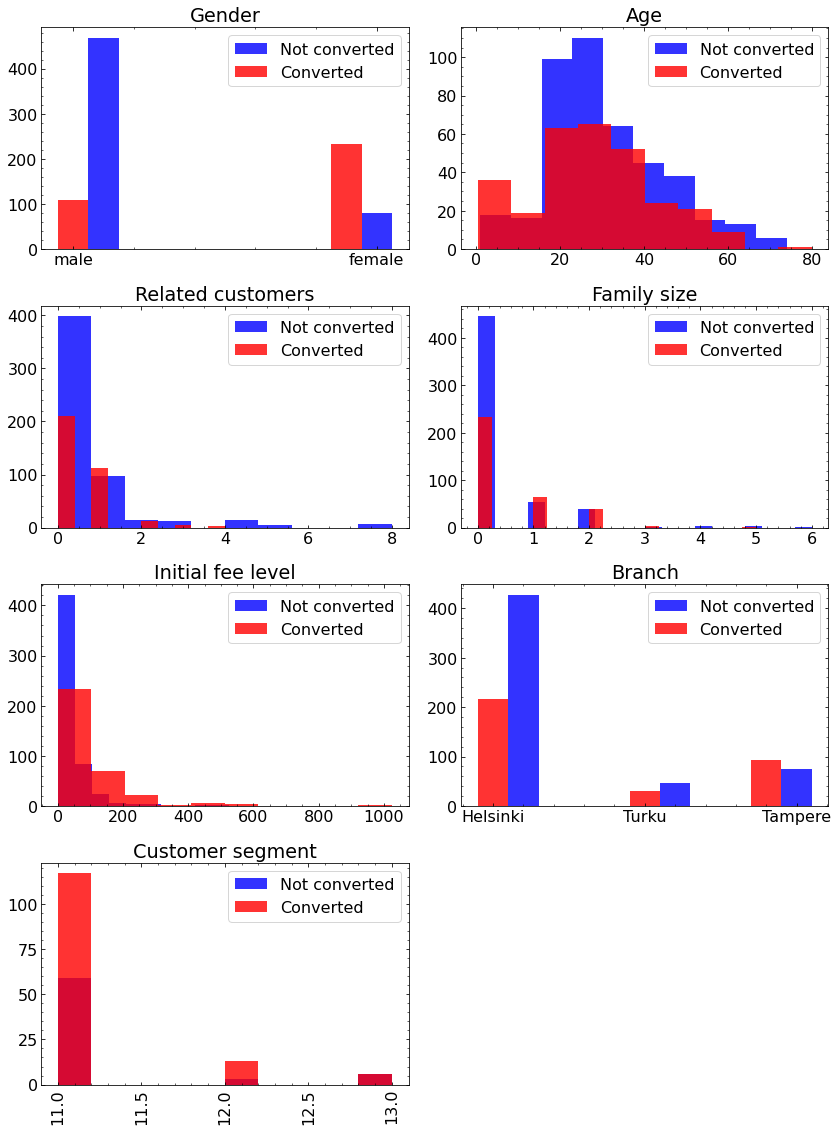

In [16]:
#Plotting the different columns as subplot
# If there have been more then 8 columns to test, I whould have made a loop to plot the different columns
fig = plt.figure(figsize=(12,16))

plt.subplot(421)
plt.hist(data_not['gender'], align='right', color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con['gender'], align='left', color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Gender')

plt.subplot(422)
plt.hist(data_not['age'], color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con['age'], color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Age')

plt.subplot(423)
plt.hist(data_not['related_customers'], color = 'b', label = 'Not converted', alpha = 0.8, bins= 10)
plt.hist(data_con['related_customers'], color = 'r', label = 'Converted', alpha = 0.8, bins = 10)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Related customers')

plt.subplot(424)
plt.hist(data_not['family_size'], color = 'b', label = 'Not converted', alpha = 0.8, bins = 20)
plt.hist(data_con['family_size'], color = 'r', label = 'Converted', alpha = 0.8, bins = 20)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Family size')

plt.subplot(425)
plt.hist(data_not['initial_fee_level'], color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con['initial_fee_level'], color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Initial fee level')

plt.subplot(426)
plt.hist(data_not_bra['branch'], align='right', color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con_bra['branch'], align='left', color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Branch')


plt.subplot(427)
plt.hist(data_not_cre['customer_segment'], color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con_cre['customer_segment'], color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Customer segment')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()
#fig.savefig('subplot1.pdf')  

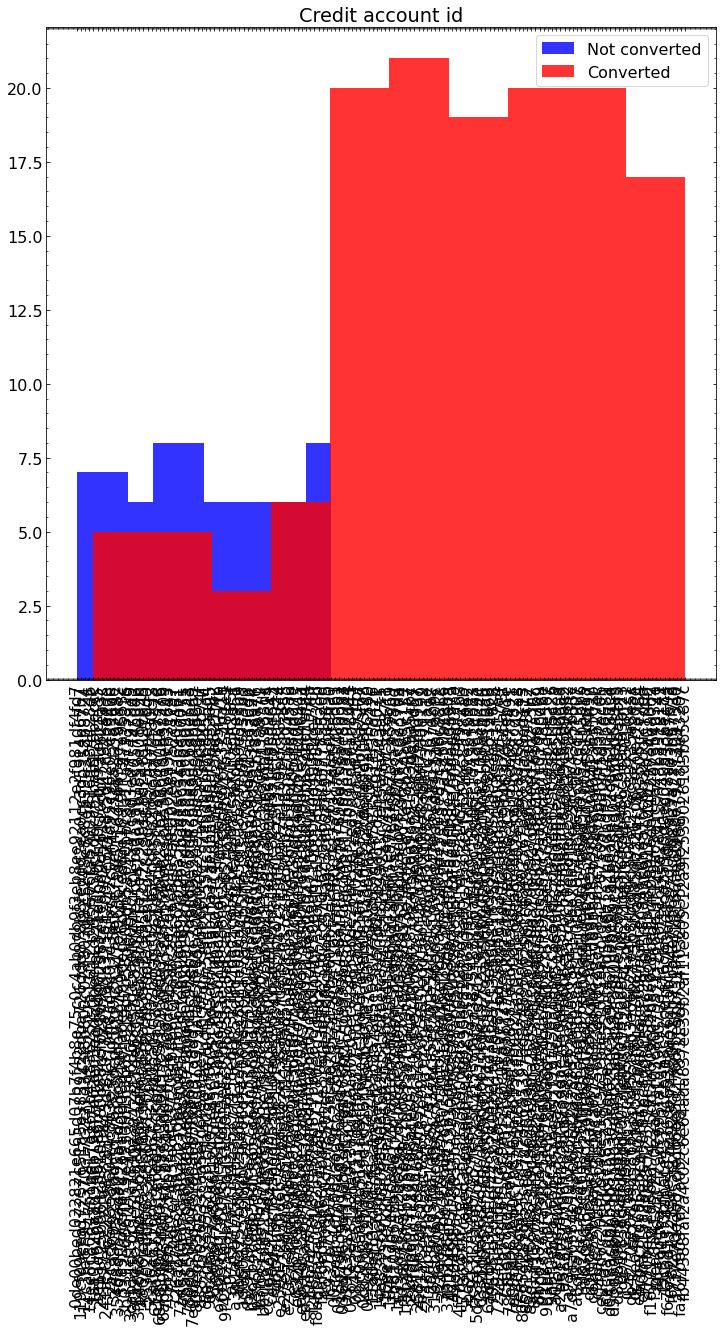

In [17]:
fig = plt.figure(figsize=(12,12))
plt.hist(data_not_cre['credit_account_id'], color = 'b', label = 'Not converted', alpha = 0.8)
plt.hist(data_con_cre['credit_account_id'], color = 'r', label = 'Converted', alpha = 0.8)
plt.tick_params(direction='in', top = bool, right = bool)
plt.minorticks_on()
plt.tick_params(which = 'minor', direction='in', top = bool, right = bool)
plt.legend()
plt.title('Credit account id')
plt.xticks(rotation=90)
plt.show()

#fig.savefig('cred1.pdf')  

## Looks at correlations

In [8]:
data.dtypes

customer_id            int64
converted              int64
customer_segment       int64
gender                object
age                  float64
related_customers      int64
family_size            int64
initial_fee_level    float64
credit_account_id     object
branch                object
dtype: object

In [9]:
#First I convert object column into a number
data['gender_num'] = np.where(data['gender'] == 'male', 0, 1)
data['branch_num'] = (data['branch']
                      .mask((data['branch']=='Helsinki'), 0)
                      .mask((data['branch']=='Tampere'), 1)
                      .mask((data['branch']=='Turku'), 2)
                     )
data['branch_num'] = pd.to_numeric(data['branch_num'])

#For credit_accond_id, it is harder to convert the column into numeric.
cred_uni = np.unique(data.sort_values('credit_account_id')['credit_account_id'])
cred_list = pd.DataFrame({'credit_account_id': cred_uni, 'num': np.arange(1, 1+len(cred_uni))})
cred_list['cred_num'] = np.where(cred_list['credit_account_id'] == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 
                         np.nan, cred_list['num'])

data = (data
        .merge(cred_list[['credit_account_id', 'cred_num']], on=['credit_account_id'], how='left')
       )
data.dtypes

customer_id            int64
converted              int64
customer_segment       int64
gender                object
age                  float64
related_customers      int64
family_size            int64
initial_fee_level    float64
credit_account_id     object
branch                object
gender_num             int32
branch_num           float64
cred_num             float64
dtype: object

### The different correlations:

In [10]:
data.corr(method='pearson')

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level,gender_num,branch_num,cred_num
customer_id,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030555,-0.059619
converted,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.108669,-0.081003
customer_segment,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.043835,-0.075839
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.012186,-0.010004
related_customers,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.060606,0.072558
family_size,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.079320,0.175518
initial_fee_level,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.063462,0.179793
gender_num,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.118593,-0.008484
branch_num,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,0.118593,1.000000,-0.084044
cred_num,-0.059619,-0.081003,-0.075839,-0.010004,0.072558,0.175518,0.179793,-0.008484,-0.084044,1.000000


In [11]:
data.corr(method='kendall')

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level,gender_num,branch_num,cred_num
customer_id,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921,-0.035079,-0.020710,-0.037493
converted,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229,0.543351,0.134032,-0.066670
customer_segment,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531,-0.129325,-0.010519,-0.080555
age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249,-0.068777,0.005627,-0.034572
related_customers,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262,0.188694,-0.024368,0.026265
family_size,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360,0.246536,-0.053144,0.096134
initial_fee_level,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000,0.213480,0.001493,0.069148
gender_num,-0.035079,0.543351,-0.129325,-0.068777,0.188694,0.246536,0.213480,1.000000,0.119150,-0.009498
branch_num,-0.020710,0.134032,-0.010519,0.005627,-0.024368,-0.053144,0.001493,0.119150,1.000000,-0.062127
cred_num,-0.037493,-0.066670,-0.080555,-0.034572,0.026265,0.096134,0.069148,-0.009498,-0.062127,1.000000


In [12]:
data.corr(method='spearman')

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level,gender_num,branch_num,cred_num
customer_id,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975,-0.042939,-0.025848,-0.054595
converted,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,0.543351,0.137869,-0.081318
customer_segment,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,-0.135775,-0.006665,-0.098259
age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,-0.083330,0.006568,-0.051958
related_customers,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,0.195204,-0.025656,0.030800
family_size,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,0.254512,-0.055968,0.124118
initial_fee_level,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,0.259593,-0.008649,0.109394
gender_num,-0.042939,0.543351,-0.135775,-0.083330,0.195204,0.254512,0.259593,1.000000,0.122561,-0.011585
branch_num,-0.025848,0.137869,-0.006665,0.006568,-0.025656,-0.055968,-0.008649,0.122561,1.000000,-0.078818
cred_num,-0.054595,-0.081318,-0.098259,-0.051958,0.030800,0.124118,0.109394,-0.011585,-0.078818,1.000000


## Fisher's exact test

In [18]:
# Checks gender and coverted
gender_fisher = np.array([[len(data_con[data_con['gender'] =='male']), len(data_con[data_con['gender'] =='female'])], 
                          [len(data_not[data_not['gender'] =='male']), len(data_not[data_not['gender'] =='female'])]])
oddsr_gender, p_gender = fisher_exact(gender_fisher)
print(f'The p value for gender is {p_gender}')

#For family size, i split in 0 and > 0
family_fisher = np.array([[len(data_con[data_con['family_size'] == 0]), len(data_con[data_con['family_size'] > 0])], 
                          [len(data_not[data_not['family_size'] == 0]), len(data_not[data_not['family_size'] > 0])]])
oddsr_family, p_family = fisher_exact(family_fisher)
print(f'The p value for family size is {p_family}')

#For initial fee level i split <100 and >100
fee_fisher = np.array([[len(data_con[data_con['initial_fee_level'] <= 100]), len(data_con[data_con['initial_fee_level'] > 100])], 
                          [len(data_not[data_not['initial_fee_level'] <= 100]), len(data_not[data_not['initial_fee_level'] > 100])]])
oddsr_fee, p_fee = fisher_exact(fee_fisher)
print(f'The p value for initial fee level is {p_fee}')

The p value for gender is 6.463921564583144e-60
The p value for family size is 1.7094571276798557e-05
The p value for initial fee level is 4.458898292329946e-17


## Convertion rates

In [14]:
# HEre a function whould be a lot easier, something like below. 
#However this will not work, the condition needs to be written differently
#def con_rate(column, condition):
#    rate = data[data[column] condition]['converted'].sum() / len(data[data[column] condition])
#    print(f'for {column}, with condition {condition}, the rate is {rate}')


total_con = data['converted'].sum() / len(data)
male_con = data[data['gender']== 'male']['converted'].sum() / len(data[data['gender']== 'male'])
female_con = data[data['gender']== 'female']['converted'].sum() / len(data[data['gender']== 'female'])
fam_con0 = data[data['family_size'] == 0]['converted'].sum() / len(data[data['family_size'] == 0])
fam_con1 = data[data['family_size'] == 1]['converted'].sum() / len(data[data['family_size'] == 1])
fam_con2 = data[data['family_size'] == 2]['converted'].sum() / len(data[data['family_size'] == 2])
fam_con3 = data[data['family_size'] > 2]['converted'].sum() / len(data[data['family_size'] > 2])
init_con0 = data[data['initial_fee_level'] <=100]['converted'].sum() / len(data[data['initial_fee_level'] <=100])
init_con1 = data[data['initial_fee_level'] >100]['converted'].sum() / len(data[data['initial_fee_level'] >100])
cus_con0 = data[data['customer_segment'] ==11]['converted'].sum() / len(data[data['customer_segment'] ==11])
cus_con1 = data[data['customer_segment'] ==12]['converted'].sum() / len(data[data['customer_segment'] ==12])
cus_con2 = data[data['customer_segment'] ==13]['converted'].sum() / len(data[data['customer_segment'] ==13])
age_con0 = data[data['age'] <= 20]['converted'].sum() / len(data[data['age'] <= 20])
age_con1 = data[(data['age'] >20) & (data['age'] <=30)]['converted'].sum() / len(data[(data['age'] >20) & (data['age'] <=30)])
age_con2 = data[(data['age'] >30) & (data['age'] <=40)]['converted'].sum() / len(data[(data['age'] >30) & (data['age'] <=40)])
age_con3 = data[(data['age'] >40) & (data['age'] <=50)]['converted'].sum() / len(data[(data['age'] >40) & (data['age'] <=50)])
age_con4 = data[(data['age'] >50) & (data['age'] <=60)]['converted'].sum() / len(data[(data['age'] >50) & (data['age'] <=60)])
age_con5 = data[(data['age'] >60)]['converted'].sum() / len(data[(data['age'] >60)])
relcus_con0 = data[data['related_customers'] ==1]['converted'].sum() / len(data[data['related_customers'] ==1])
relcus_con1 = data[data['related_customers'] ==2]['converted'].sum() / len(data[data['related_customers'] ==2])
relcus_con2 = data[data['related_customers'] ==3]['converted'].sum() / len(data[data['related_customers'] ==3])
relcus_con3 = data[data['related_customers'] >3]['converted'].sum() / len(data[data['related_customers'] >3])
bra_con0 = data[data['branch'] == 'Helsinki']['converted'].sum() / len(data[data['branch'] =='Helsinki'])
bra_con1 = data[data['branch'] =='Tampere']['converted'].sum() / len(data[data['branch'] =='Tampere'])
bra_con2 = data[data['branch'] =='Turku']['converted'].sum() / len(data[data['branch'] =='Turku'])

cred_con0 = (data[data['credit_account_id'] =='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']['converted'].sum() / 
             len(data[data['credit_account_id'] =='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']))
cred_con1 = (data[data['credit_account_id'] !='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']['converted'].sum() / 
             len(data[data['credit_account_id'] !='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']))

print(f'total {total_con}')
print(f'Male {male_con}')
print(f'female {female_con}')
print(f'fam 0 {fam_con0}')
print(f'fam 1 {fam_con1}')
print(f'fam 2 {fam_con2}')
print(f'fam > 2 {fam_con3}')
print(f'fee <= 100 {init_con0}')
print(f'fee > 100 {init_con1}')
print(f'cus seg = 11 {cus_con0}')
print(f'cus seg = 12 {cus_con1}')
print(f'cus seg = 13 {cus_con2}')
print(f'age <= 20 {age_con0}')
print(f'age > 20, <= 30 {age_con1}')
print(f'age > 30, <= 40 {age_con2}')
print(f'age > 40, <= 50 {age_con3}')
print(f'age > 50, <= 60 {age_con4}')
print(f'age >  60 {age_con5}')
print(f'rel cus = 1 {relcus_con0}')
print(f'rel cus = 2 {relcus_con1}')
print(f'rel cus = 3 {relcus_con2}')
print(f'rel cus > 3 {relcus_con3}')
print(f'bra Helsinki {bra_con0}')
print(f'bra Tampere {bra_con1}')
print(f'bra Turku {bra_con2}')
print(f'cred none {cred_con0}')
print(f'cred has {cred_con1}')

total 0.3838383838383838
Male 0.18890814558058924
female 0.7420382165605095
fam 0 0.34365781710914456
fam 1 0.5508474576271186
fam 2 0.5
fam > 2 0.26666666666666666
fee <= 100 0.31874145006839943
fee > 100 0.68125
cus seg = 11 0.6296296296296297
cus seg = 12 0.47282608695652173
cus seg = 13 0.24236252545824846
age <= 20 0.4581005586592179
age > 20, <= 30 0.3652173913043478
age > 30, <= 40 0.44516129032258067
age > 40, <= 50 0.38372093023255816
age > 50, <= 60 0.40476190476190477
age >  60 0.22727272727272727
rel cus = 1 0.5358851674641149
rel cus = 2 0.4642857142857143
rel cus = 3 0.25
rel cus > 3 0.1
bra Helsinki 0.33695652173913043
bra Tampere 0.5535714285714286
bra Turku 0.38961038961038963
cred none 0.29985443959243085
cred has 0.6666666666666666
